In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from intellegent_placer.image_processing import Object, get_polygon_from_img, compress_image
from os import listdir, path

## Обработка предметов из набора данных
Загружаем каждую фотографию, сжимаем ее для ускорения обработки (Пока что на конкретный процент, далее будет в пропорциях относительно размерности входной фотографии)

Далее создаем объект - предобработанный предмет из набора данных, который впоследствии будем использовать для сопоставления предметов из датасета

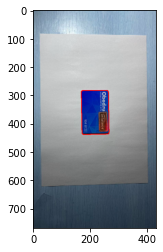

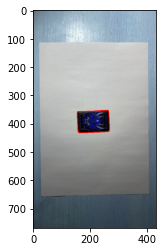

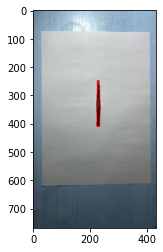

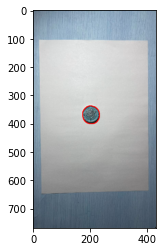

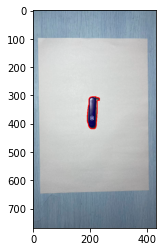

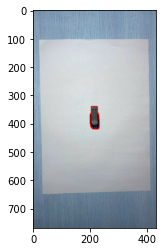

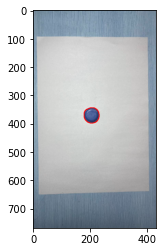

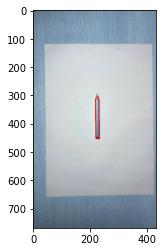

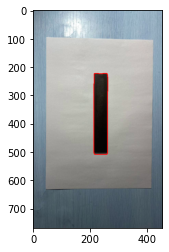

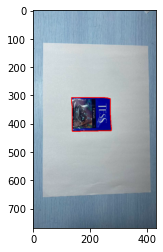

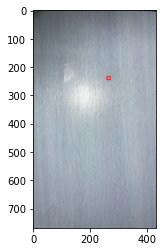

In [2]:
path_to_folder = "images/objects"
for image in listdir(path_to_folder):
    image_path = path.join(path_to_folder, image)
    img = cv2.imread(image_path)
    img = compress_image(img, 60)
    result = Object(img, image_path)
    processed_items = [(result.mask * 255).astype("uint8"), result.contour_image]
    plt.imshow(result.contour_image)
    plt.show()

## Обработка датасета

Пока что реализован поиск многоугольника с помощью детектора Кэнни. Помимо многоугольника ищутся края листа и границы предметов, поэтому будет обрабатываться лучше. 

Предметы также находятся, но еще не сопоставляются по особым точкам из набора данных

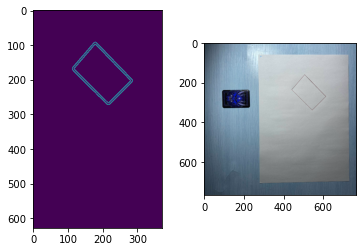

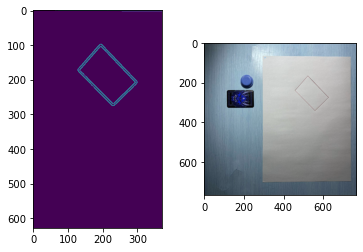

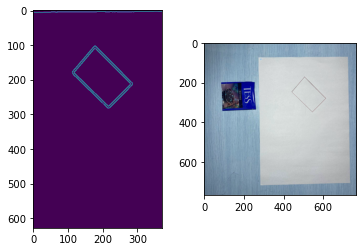

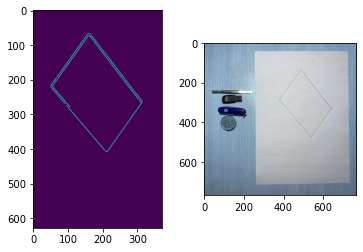

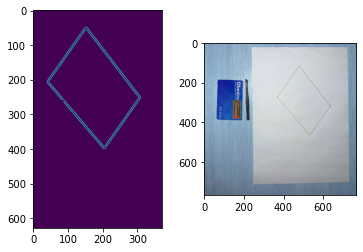

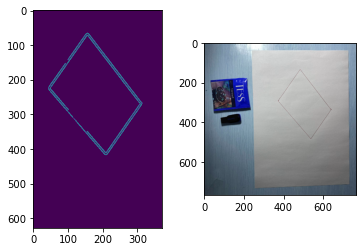

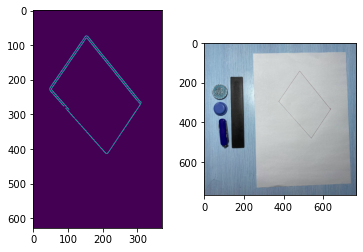

In [3]:
path_to_folder = "images/dataset"
for image in listdir(path_to_folder):
    image_path = path.join(path_to_folder, image)
    if path.splitext(image_path)[1] == ".jpg":
        fig, ax = plt.subplots(1, 2)
        img = cv2.imread(image_path)
        img = compress_image(img, 60)
        result = get_polygon_from_img(img)
        ax[0].imshow(result)
        ax[1].imshow(img)
        plt.show()